## Lesson-01 通过构建线性回归-理解Loss函数-梯度下降与函数拟合

## Load Dataset

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
X, y = data['data'], data['target']

In [7]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [6]:
y[1]

21.6

In [7]:
X.shape

(506, 13)

In [8]:
len(y)

506

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

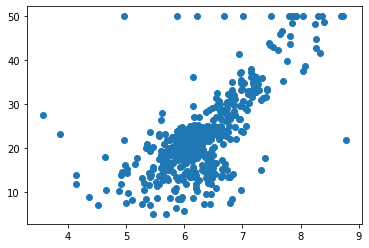

In [11]:
plt.scatter(X[:, 5], y)

## 目标：就是要找一个“最佳”的直线，来拟合卧室和房价的关系

In [14]:
import random 

In [15]:
k, b = random.randint(-100, 100), random.randint(-100, 100)

def func(x):
    return k*x + b

In [16]:
X_rm = X[:, 5]


In [17]:
y_hat = [func(x) for x in X_rm]

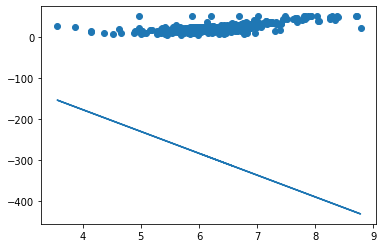

In [18]:
plt.scatter(X[:, 5], y)
plt.plot(X_rm, y_hat)

## 随机画了一根直线，结果发现，离得很远？🙁

In [20]:
def draw_room_and_price():
    plt.scatter(X[:, 5], y)

the random k : 75, b: -43


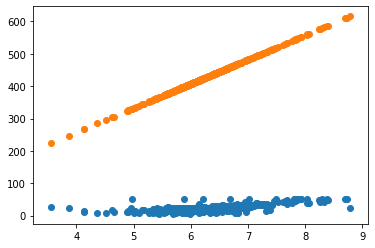

In [26]:
def price(x, k, b):
    return k*x + b

k, b = random.randint(-100, 100), random.randint(-100, 100)

price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
print('the random k : {}, b: {}'.format(k, b))
draw_room_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 目标是想找到最“好”的K和b？ 

## 我们需要一个标准去衡量这个东西到底好不好

y_true, $\hat{y}$

衡量y_true, $\hat{y}$ -> 损失函数

In [27]:
y_true = [1, 4, 1, 4,1, 4, 1,4]
y_hat = [2, 3, 1, 4, 1, 41, 31, 3]

## L1-Loss

$$ loss = \frac{1}{n} \sum_{i}^{n}| y_{true-i} - \hat{y_i} | $$

In [28]:
y_ture = [3, 4, 4]
y_hat_1 = [1, 1, 4]
y_hat_2 = [3, 4, 0]

## L1-Loss 值是多少呢？ |3 - 1| + |4-1|+ |4 -4| = 2 + 2 + 0 = 4

## $\hat{y_2}$ L1-Loss |3-3| + |4-4|+|4-0| = 4

$$ loss = \frac{1}{n} \sum_{i}^{n} (y_i - \hat{y_i}) ^ 2 $$

In [29]:
def loss(y, y_hat):
    sum_ = sum([(y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)])
    return sum_ / len(y)

In [30]:
y_ture = [3, 4, 4]
y_hat_1 = [1, 1, 4]
y_hat_2 = [3, 4, 0]

print(loss(y_ture, y_hat_1))
print(loss(y_ture, y_hat_2))

4.333333333333333
5.333333333333333


the random k : 52, b: -32
The Loss of k: 52, b: -32 is 75080.23543377068


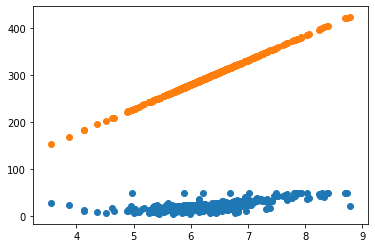

In [37]:
def price(x, k, b):
    return k*x + b

k, b = random.randint(-100, 100), random.randint(-100, 100)

price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
print('the random k : {}, b: {}'.format(k, b))
draw_room_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

cost = loss(list(y), price_by_random_k_and_b)

print('The Loss of k: {}, b: {} is {}'.format(k, b, cost))

## Loss 一件事情你只要知道如何评价它好与坏 基本上就完成了一般了工作了

## 最简单的方法，我们随机生成若干组k和b，然后找到最佳的一组k和b

In [38]:
min_cost

576020.1525495064

In [34]:
def price(x, k, b):
    return k*x + b

trying_times = 5000

best_k, best_b = None, None

min_cost = float('inf')

losses = []

for i in range(trying_times):
    k = random.random() * 100 - 200
    b = random.random() * 100 - 200
    
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    #draw_room_and_price()
    #plt.scatter(X_rm, price_by_random_k_and_b)

    cost = loss(list(y), price_by_random_k_and_b)
    
    if cost < min_cost: 
        min_cost = cost
        best_k, best_b = k, b
        print('在第{}， k和b更新了'.format(i))
        losses.append(min_cost)

在第0， k和b更新了
在第1， k和b更新了
在第11， k和b更新了
在第52， k和b更新了
在第151， k和b更新了
在第639， k和b更新了
在第1447， k和b更新了
在第1998， k和b更新了
在第2338， k和b更新了


## We could add a visualize 

In [197]:
min_cost

575210.0104603993

In [39]:
best_k, best_b

(-100.54918908597296, -100.5706311130199)

In [40]:
def plot_by_k_and_b(k, b):
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    draw_room_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

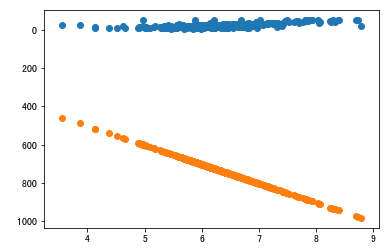

In [174]:
plot_by_k_and_b(best_k, best_b)

## 2-nd 方法 进行方向的调整

## k的变化有两种： 增大和减小
## b的变化也有两种：增大和减小

k, b这一组值我们进行变化，就有4种组合：

当，k和b沿着某个方向$d_n$变化的时候，如何，loss下降了，那么，k和b接下来就继续沿着$d_n$这个方向走，否则，我们就换一个方向

In [217]:
directions = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]


def price(x, k, b):
    return k*x + b

trying_times = 10000

best_k = random.random() * 100 - 200
best_b = random.random() * 100 - 200

next_direction = random.choice(directions)

min_cost = float('inf')

losses = []

scala = 0.3

for i in range(trying_times):
    current_direction = next_direction
    k_direction, b_direction = current_direction
    
    current_k = best_k + k_direction * scala
    current_b = best_b + b_direction * scala
    
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    cost = loss(list(y), price_by_random_k_and_b)
    
    if cost < min_cost: 
        min_cost = cost
        best_k, best_b = current_k,current_b
        print('在第{}， k和b更新了'.format(i))
        losses.append((i, min_cost))
        next_direction = current_direction
    else:
        next_direction = random.choice(list(set(directions) - {current_direction}))

在第0， k和b更新了
在第2， k和b更新了
在第3， k和b更新了
在第4， k和b更新了
在第5， k和b更新了
在第6， k和b更新了
在第7， k和b更新了
在第8， k和b更新了
在第9， k和b更新了
在第10， k和b更新了
在第11， k和b更新了
在第12， k和b更新了
在第13， k和b更新了
在第14， k和b更新了
在第15， k和b更新了
在第16， k和b更新了
在第17， k和b更新了
在第18， k和b更新了
在第19， k和b更新了
在第20， k和b更新了
在第21， k和b更新了
在第22， k和b更新了
在第23， k和b更新了
在第24， k和b更新了
在第25， k和b更新了
在第26， k和b更新了
在第27， k和b更新了
在第28， k和b更新了
在第29， k和b更新了
在第30， k和b更新了
在第31， k和b更新了
在第32， k和b更新了
在第33， k和b更新了
在第34， k和b更新了
在第35， k和b更新了
在第36， k和b更新了
在第37， k和b更新了
在第38， k和b更新了
在第39， k和b更新了
在第40， k和b更新了
在第41， k和b更新了
在第42， k和b更新了
在第43， k和b更新了
在第44， k和b更新了
在第45， k和b更新了
在第46， k和b更新了
在第47， k和b更新了
在第48， k和b更新了
在第49， k和b更新了
在第50， k和b更新了
在第51， k和b更新了
在第52， k和b更新了
在第53， k和b更新了
在第54， k和b更新了
在第55， k和b更新了
在第56， k和b更新了
在第57， k和b更新了
在第58， k和b更新了
在第59， k和b更新了
在第60， k和b更新了
在第61， k和b更新了
在第62， k和b更新了
在第63， k和b更新了
在第64， k和b更新了
在第65， k和b更新了
在第66， k和b更新了
在第67， k和b更新了
在第68， k和b更新了
在第69， k和b更新了
在第70， k和b更新了
在第71， k和b更新了
在第72， k和b更新了
在第73， k和b更新了
在第74， k和b更新了
在第75， k和b更新了
在第76， k和b更新了
在第77， k和b更新了
在第78， k和

In [218]:
len(losses)

638

In [199]:
min_cost

46.517707996138384

## 3-rd 梯度下降

## 我们能不能每一次的时候，都按照能够让它Loss减小方向走？
## 都能够找到一个方向

$$ loss = \frac{1}{n} \sum_i^n (y_i - \hat{y})**2 $$
$$ loss = \frac{1}{n} \sum_i^n (y_i - (k*x_i + b))^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b))x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - (kx_i + b))$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y}_i)x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y}_i)$$



In [211]:
def partial_k(x, y, y_hat):
    gradient = 0 
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / len(y) * gradient

def partial_b(y, y_hat):
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
        
    return -2 / len(y) * gradient

In [253]:
def price(x, k, b): 
    # Operation : CNN, RNN, LSTM, Attention 比KX+B更复杂的对应关系
    return k*x + b

trying_times = 50000

min_cost = float('inf')

losses = []

scala = 0.3

k, b = random.random() * 100 - 200, random.random() * 100 - 200
# 参数初始化问题！ Weight Initizalition 问题！

best_k, best_b = None, None

learning_rate = 1e-3  # Optimizer Rate

for i in range(trying_times):
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    cost = loss(list(y), price_by_random_k_and_b)
    
    if cost < min_cost: 
       # print('在第{}， k和b更新了'.format(i))
        min_cost = cost
        best_k, best_b = k, b
        losses.append((i, min_cost))

    k_gradient = partial_k(X_rm, y, price_by_random_k_and_b) # 变化的方向
    b_gradient = partial_b(y, price_by_random_k_and_b)
    
    k = k + (-1 * k_gradient) * learning_rate
    ## 优化器: Optimizer 
    ## Adam 动量 momentum
    b = b + (-1 * b_gradient) * learning_rate

## 封装成一块一块儿的，别人用的时候，不需要重新在开始写了

In [249]:
len(losses)

50000

In [250]:
print(min_cost)

55.362127043738944


In [251]:
best_k, best_b

(13.959248525681632, -65.56745860849375)

In [240]:
def square(x): 
    return 10 * x**2 + 5 * x + 5

In [241]:
import numpy as np

In [242]:
_X = np.linspace(-100, 100)

In [243]:
_y = [square(x) for x in _X]

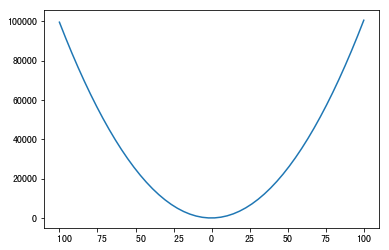

In [244]:
plt.plot(_X, _y)

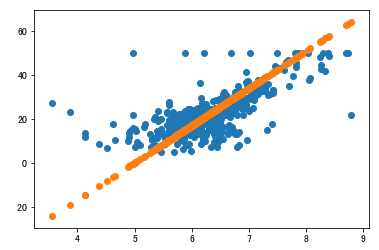

In [245]:
plot_by_k_and_b(k=best_k, b=best_b)

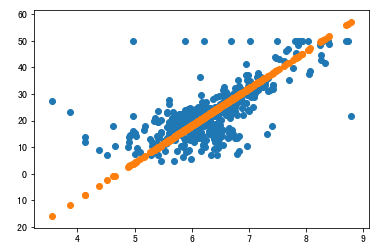

In [252]:
plot_by_k_and_b(k=best_k, b=best_b)

## Assignment

### 1. 课程上的代码 如果你想学好的话 一定要复现！！！
### 2. 我们课程上的Loss函数是L2-Loss，我们把代码改成L1-Loss，然后求解梯度下降，并且观察Loss下降的趋势: Loss函数，以为着Partial也要改！